<h1 style='text-align:center; font-weight:1000'>
    Estadística Inferencial
</h1>

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from scipy import stats

In [195]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier

## **1. Funciones de muestreo**

In [4]:
df = pd.read_csv('Data/econdata.csv')

In [5]:
df.head(1)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez


### **1.1 Muestreo aleatorio simple**

In [6]:
df.sample(8)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
150,150,"19.440448428,-99.1365429261","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_065_10,Cuautémoc,B,Hotel,Moderno
72,72,"19.4454901265,-99.1471012862","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_046_14,Cuautémoc,B,Hotel,Atoyac
104,104,"19.43397933,-99.13044075","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Hotel,Palacio
226,226,"19.4416748524,-99.1365878489","{""type"": ""Polygon"", ""coordinates"": [[[-99.1370...",004_052_01,Cuauhtémoc,B,Mercado,De Muebles
33,33,"19.4341938751,-99.1352210651","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_007_04,Cuautémoc,A,Hotel,Washingtonw
117,117,"19.4253041176,-99.1405962735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",001_078_03,Cuautémoc,B,Hotel,Mazatlán
182,182,"19.42407591,-99.1424737531","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",001_094_26,Cuautémoc,B,Hotel,Macao


### **1.2 Muestreo sistemático**

In [7]:
posicion_inicial = 0
posicion_final = len(df)
steps = 3

df.iloc[list(range(posicion_inicial,posicion_final,steps)),:]

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz
...,...,...,...,...,...,...,...,...
216,216,"19.4247697438,-99.1249707246","{""type"": ""Polygon"", ""coordinates"": [[[-99.1250...",323_118_37,Venustiano Carranza,B,Mercado,Lamininas de La Merced
219,219,"19.4234096295,-99.1438351156","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_118_03,Cuautémoc,B,Hotel,Prado Floresta
222,222,"19.4397905042,-99.134628735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_063_10,Cuautémoc,A,Hotel,Ladero
225,225,"19.43094655,-99.12455418","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_027_04,Venustiano Carranza,B,Hotel,Gran Veracruz


### **1.3 Muestreo estratificado**

In [8]:
df['category'] = df['delegacion'] + '_' + df['tipo']

In [9]:
pd.DataFrame(round(df['category'].value_counts()/len(df) * 100, 2))

,category
Cuautémoc_Hotel,64.35
Cuautémoc_Museo,15.65
Venustiano Carranza_Hotel,7.83
Cuauhtémoc_Mercado,7.39
Venustiano Carranza_Mercado,4.78


In [10]:
df_est = pd.DataFrame(columns = df.columns)
muestra = 0.25

for i in set(df['category']):
    df_muestra = df.query(f'category == "{i}"').sample(int(muestra * len(df.query(f'category == "{i}"')))).copy()
    df_est = pd.concat([df_est, df_muestra], axis=0)

In [11]:
pd.DataFrame(round(df_est['category'].value_counts()/len(df_est) * 100, 2))

,category
Cuautémoc_Hotel,66.07
Cuautémoc_Museo,16.07
Cuauhtémoc_Mercado,7.14
Venustiano Carranza_Hotel,7.14
Venustiano Carranza_Mercado,3.57


## **2. Estadísticos y cálculos**

In [12]:
iris = sns.load_dataset('iris')

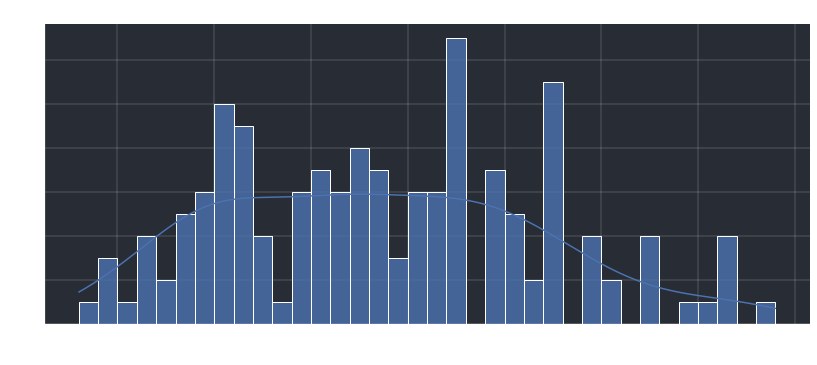

In [13]:
sns.set(rc={'figure.facecolor': '#21252b', 'axes.facecolor': '#282c34'})

sns.displot(data=iris, x='sepal_length', kde=True, alpha=0.8, bins=36, aspect=11.5/5)

plt.title('Histograma de frecuencia del largo del sépalo', fontweight=1000, color='w', fontsize=14)

plt.xlabel('Largo del sépalo', color='w', fontweight=1000)
plt.xticks(color='white', size=12)

plt.ylabel('Conteo', color='w', fontweight=1000)
plt.yticks(color='white', size=12)

plt.grid(linewidth=0.2)

plt.show()

#### **Promedio**

In [14]:
round(iris['sepal_length'].mean(), 2)

5.84

#### **Varianza**

In [15]:
round(iris['sepal_length'].var(), 2)

0.69

#### **Desviación estándar**

In [16]:
round(iris['sepal_length'].std(), 2)

0.83

### **Aplicando muestreo aleatorio simple**

In [17]:
iris_sample = iris.sample(frac=0.5)

#### **Promedio muestral**

In [18]:
iris_sample['sepal_length'].mean()

5.794666666666666

#### **Varianza muestral**

In [19]:
round(iris_sample['sepal_length'].var(), 2)

0.76

#### **Desviación estándar muestral**

In [20]:
round(iris_sample['sepal_length'].std(), 2)

0.87

## **3. Intervalos de Confianza**

### **Conociendo el nivel de significancia**

El valor de alpha es del 5%. El intervalo de confienza es del 95%

In [21]:
# Valor Z
round(stats.norm.ppf(0.975), 2)

1.96

El intervalo de confianza sería: [-1.96, 1.96]

### **Conociendo la media y la desviación estándar**

**Media** = 28 

**Desviación estándar** = 4 

**alpha** = 20% El intervalo de confienza es del 80%

In [22]:
# Valor Z
z_value = round(stats.norm.ppf(0.9), 2)

El intervalo de confianza con valores z sería: [-1.28, 1.28]

Conociendo la media y la desviación estándar podemos calcular los valores.

$$Z = \frac{x - \mu}{\sigma}$$

Entonces.

$$x = ({Z * \sigma}) + {\mu}$$

In [23]:
lim_inf = (-z_value * 4) + 28
lim_sup = (z_value * 4) + 28

In [24]:
[lim_inf, lim_sup]

[22.88, 33.12]

In [25]:
def intervalos_confianza(alpha, mean, std):
    confianza = 1 - (alpha/2)    
    z_value = round(stats.norm.ppf(confianza), 2)
    
    lim_inf = (-z_value * 4) + 28
    lim_sup = (z_value * 4) + 28
    
    return [lim_inf, lim_sup]

### **Aplicando a una simulación**

In [26]:
var_1 = np.random.randint(0, 10, 10)
var_2 = var_1 + np.random.normal(0, 1, 10)

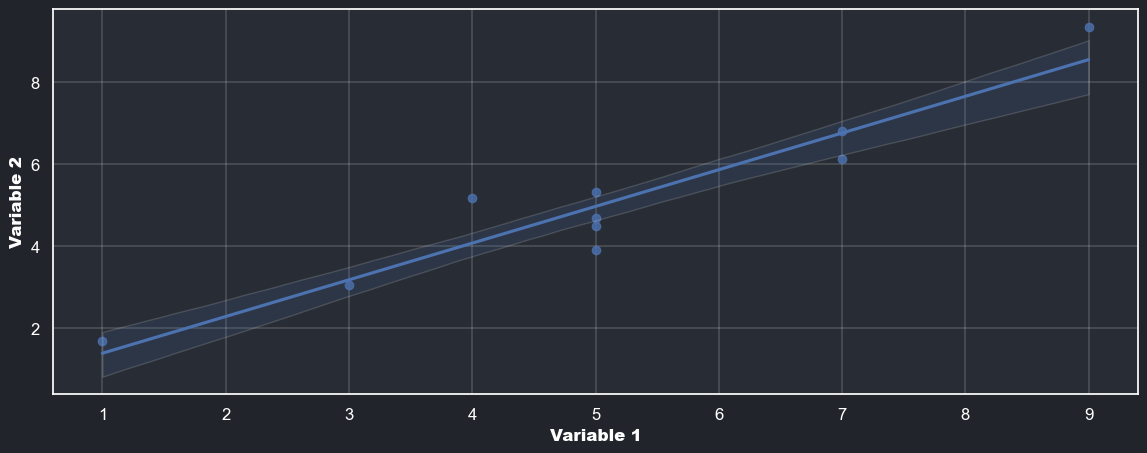

In [27]:
fig, ax = plt.subplots(figsize=(14, 5))

sns.regplot(x=var_1, y=var_2, ci=80)

plt.xlabel('Variable 1', color='w', fontweight=1000)
plt.xticks(color='white', size=12)

plt.ylabel('Variable 2', color='w', fontweight=1000)
plt.yticks(color='white', size=12)

plt.grid(linewidth=0.2)

plt.show()

In [28]:
datos = pd.DataFrame(list(zip(var_1, var_2)), columns=['Variable_1', 'Variable_2'])

In [29]:
# Para muestras menores a 30. En este caso utilizamos la distribución t
stats.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=stats.sem(datos))

C:\Users\jmart\anaconda3\envs\StarterPack\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([3.50219164, 3.55736205]), array([6.69780836, 6.56524065]))

In [30]:
# Para muestras mayores a 29. En este caso utilizamos la distribución normal
stats.norm.interval(alpha=0.95, loc=np.mean(datos), scale=stats.sem(datos))

(array([3.71563693, 3.75826772]), array([6.48436307, 6.36433498]))

## **4. Pruebas de hipótesis**

<ol>
    <li>Establecer una hipótesis nula (Ho) y una hipótesis alternativa (H1).</li>
    <li>Seleccionar el nivel de significancia.</li>
    <li>Seleccionar el estadístico de prueba.</li>
    <li>Formular la regla de decisión.</li>
    <li>Interpretar los resultados y tomar una decisión.</li>
<ol>

### **Tipos de pruebas de hipótesis**

#### **Distribución T-Student**

Se usa para estimar una **media de población** normalmente distribuida a partir de una muestra pequeña que sigue una distribución normal y de la que desconocemos la desviación estándar.

$$t = \frac{x_1 - x_2}{\sqrt{\frac{(s_1)^{2}}{n_1} + \frac{(s_2)^{2}}{n_2}}}$$

**Ho:** La distribución de las variables es similar

**H1:** La distribución de las variables no es similar

In [55]:
se_length = iris['sepal_length'].std() / np.sqrt(10) 
se_width = iris['sepal_width'].std() / np.sqrt(10)

In [56]:
sed = np.sqrt((se_length**2) + (se_width**2))

In [57]:
t_stat = (iris['sepal_length'].mean() - iris['sepal_width'].mean()) / sed
t_stat

9.414779428410263

In [58]:
p = stats.ttest_ind(iris['sepal_length'], iris['sepal_width'])
p

Ttest_indResult(statistic=36.463283934449116, pvalue=7.027919392009369e-112)

In [68]:
print(f'''El valor absoluto de t {round(t_stat, 2)} es mayor que nuestro valor crítico {round(p.pvalue, 2)}. Entonces las distribuciones son diferentes.

Rechazamos la hipotesis nula.''')

El valor absoluto de t 9.41 es mayor que nuestro valor crítico 0.0. Entonces las distribuciones son diferentes.

Rechazamos la hipotesis nula.


#### **Coefiente de Pearson**

Se usa para medir la dependecia lineal (correlación) entre dos variables cuantitativas.

In [72]:
correlation = iris['sepal_length'].corr(iris['sepal_width'])

In [73]:
correlation

-0.11756978413300208

In [74]:
stats.pearsonr(iris['sepal_length'], iris['sepal_width'])

(-0.11756978413300205, 0.15189826071144918)

No hay correlación entre las variables.

#### **Análisis de Varianza - ANOVA**

Se usa para comparar las varianzas entre las medias de diferentes grupos.

In [75]:
stats.f_oneway(iris['sepal_length'], iris['sepal_width'])

F_onewayResult(statistic=1329.571075284254, pvalue=7.027919392009998e-112)

El pvalue es menor a nuestro nivel de significancia, 0.05. Rechazamos la Ho

### **Tipos de errores**

**Decisiones correctas**

- Rechazar Ho cuando es falsa.
- No rechazar Ho cuando es verdadera.

**Decisiones incorrectas**

- Rechazar Ho cuando es verdadera.
- No rechazar Ho cuando es falsa.

<table style='text-align:center'>
  <tr>
    <th></th>
    <th><strong>Ho Verdadera</strong></th>
    <th><strong>Ho Falsa</strong></th>
  </tr>
  <tr>
    <td><strong>Rechazamos Ho</strong></td>
    <td>
        Error tipo I <br/>
        P(Error tipo I) = α
    </td>
    <td>Decisión correcta</td>
  </tr>
  <tr>
    <td><strong>No rechazamos Ho</strong></td>
    <td>Decisión correcta</td>
    <td>
        Error tipo II <br/>
        P(Error tipo II) = β
    </td>
  </tr>
</table>

## **5. Bootstraping**

In [77]:
data = np.random.normal(loc=34, size=10000)

In [125]:
promedio = []

for i in range(40):
    muestra = np.mean(random.sample(data.tolist(), 5))
    promedio.append(muestra)
    
round(np.mean(promedio), 2)

33.91

## **6. Validación cruzada**

**Modelo**

In [126]:
breast = pd.read_csv('Data/breast.csv')

In [139]:
breast.drop('Unnamed: 32', axis=1, inplace=True)

In [156]:
X = breast.drop(['id', 'diagnosis'], axis=1)
y = pd.get_dummies(breast[['diagnosis']])[['diagnosis_B']]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [162]:
modelo = DecisionTreeClassifier()

In [166]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [168]:
modelo.score(X_test, y_test)

0.868421052631579

In [192]:
pd.DataFrame(zip(modelo.feature_names_in_, modelo.feature_importances_*100), columns=['Variable', 'Importance']).sort_values('Importance', ascending=False).head()

,Variable,Importance
20,radius_worst,75.154538
27,concave points_worst,10.866547
1,texture_mean,4.633024
8,symmetry_mean,2.254554
13,area_se,2.101873


**Validación cruzada**

In [194]:
modelo = DecisionTreeClassifier()
kfold_validation = KFold(10)

In [196]:
resultados = cross_val_score(modelo, X, y, cv=kfold_validation)

In [198]:
resultados.mean()

0.9226190476190477

In [199]:
resultados

array([0.92982456, 0.9122807 , 0.89473684, 0.96491228, 0.85964912,
       0.96491228, 0.89473684, 0.96491228, 0.94736842, 0.89285714])